In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
#Load tha Dataset
Ecom_data = pd.read_csv('/content/drive/MyDrive/Data/ecommerce_recommendation_dataset.csv')

In [3]:
# Define numerical and categorical features
numerical_features = ["price", "rating", "time_on_page", "session_duration", "product_popularity", "average_spent"]
categorical_features = ["category", "user_gender", "user_location"]

In [5]:
Ecom_data['spending_per_minute'] = Ecom_data['average_spent']/Ecom_data['session_duration']
numerical_features.append('spending_per_minute')

In [6]:
Ecom_data.head()

,user_id,product_id,category,price,rating,review_count,user_age,user_gender,user_location,purchase_history,...,review_sentiment_score,user_engagement_score,ad_click_rate,time_of_day,day_of_week,season,payment_method,coupon_used,product_popularity,spending_per_minute
0,78517,1645,Books,842.23,2,155,24,Other,Urban,False,...,-0.28,0.68,0.04,Night,Thursday,Summer,Debit Card,False,0.54,0.690155
1,52887,100,Books,253.76,3,331,43,Other,Suburban,False,...,0.28,0.11,0.89,Morning,Saturday,Summer,Debit Card,False,0.77,3.146565
2,59395,585,Books,483.65,2,236,64,Female,Rural,True,...,0.23,0.35,0.99,Evening,Tuesday,Fall,Debit Card,False,0.14,0.149732
3,54739,3774,Groceries,459.37,2,227,34,Female,Urban,False,...,0.93,0.73,0.16,Afternoon,Tuesday,Spring,Credit Card,False,0.18,4.084240
4,42723,2119,Groceries,150.11,2,214,51,Female,Urban,True,...,0.11,0.26,0.17,Night,Wednesday,Spring,PayPal,False,0.66,1.485493


In [7]:
# Handle missing values
num_imputer = SimpleImputer(strategy="mean")
cat_imputer = SimpleImputer(strategy="most_frequent")

In [8]:
# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", Pipeline([("imputer", num_imputer), ("scaler", StandardScaler())]), numerical_features),
        ("cat", Pipeline([("imputer", cat_imputer), ("encoder", OneHotEncoder(handle_unknown="ignore"))]), categorical_features)
    ]
)

In [9]:
# Define target variable
target = "purchase_history"

In [10]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    Ecom_data[numerical_features + categorical_features], Ecom_data[target], test_size=0.3, random_state=42
)

In [12]:
# Apply preprocessing to train and test sets
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [13]:
# Output shape of transformed data
print("Train Set Shape:", X_train_preprocessed.shape)
print("Test Set Shape:", X_test_preprocessed.shape)

Train Set Shape: (42000, 18)
Test Set Shape: (18000, 18)


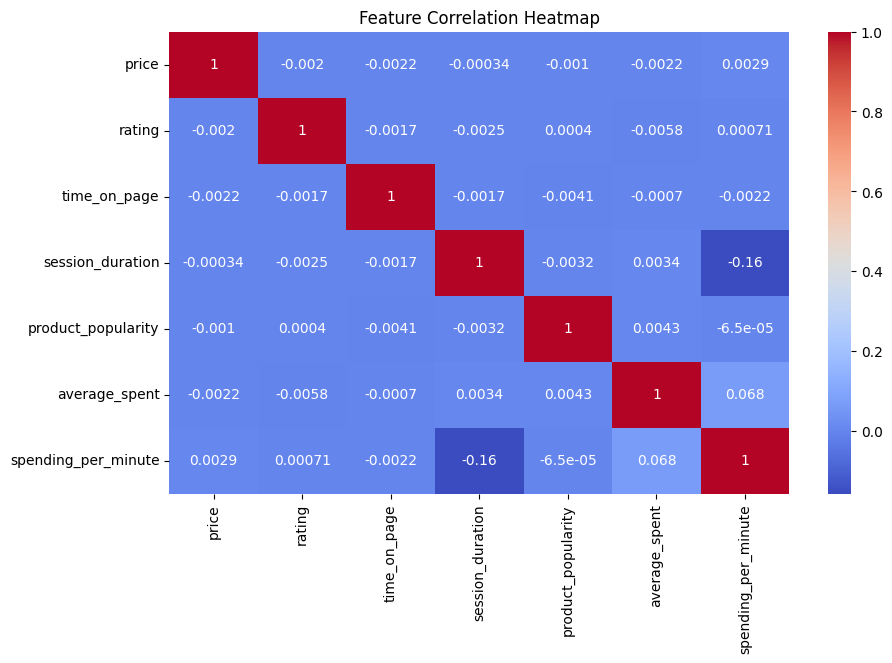

In [14]:
# Exploratory Data Analysis (EDA)
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(Ecom_data[numerical_features].corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

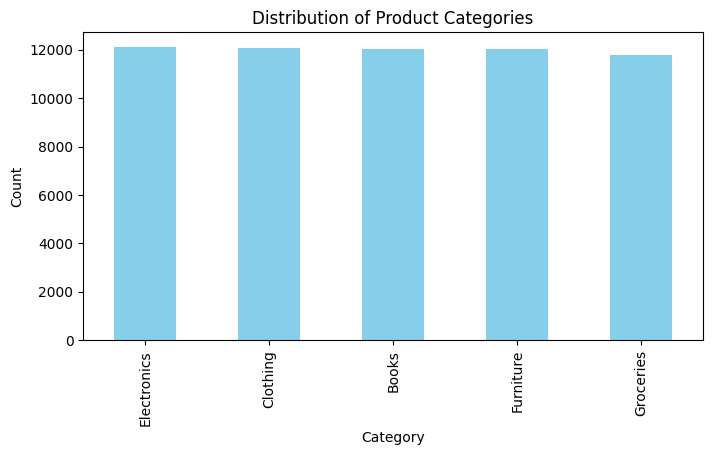

In [15]:
# Distribution of product categories
plt.figure(figsize=(8, 4))
Ecom_data["category"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Distribution of Product Categories")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()

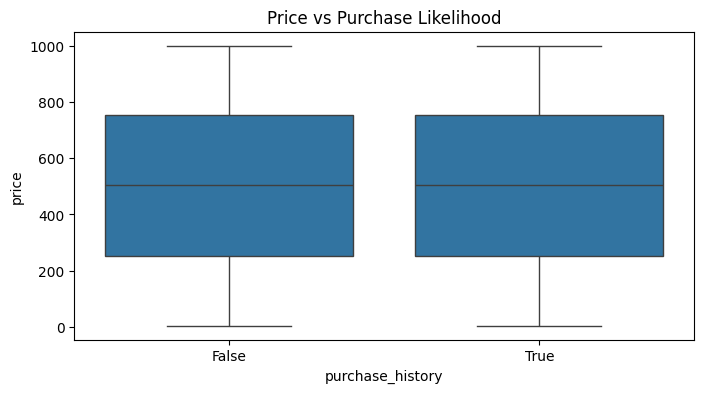

In [16]:
# Relationship between price, rating, and purchase likelihood
plt.figure(figsize=(8, 4))
sns.boxplot(x="purchase_history", y="price", data=Ecom_data)
plt.title("Price vs Purchase Likelihood")
plt.show()

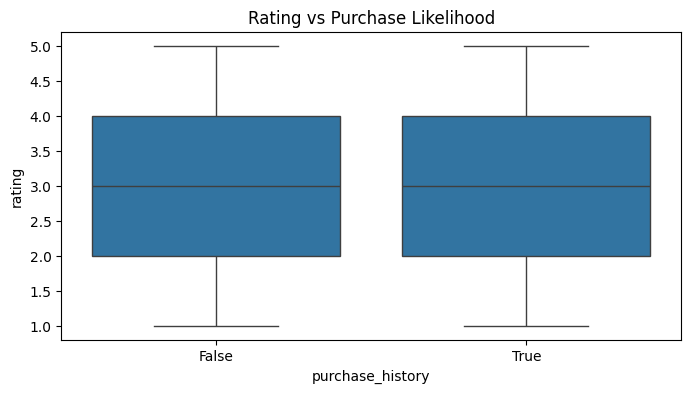

In [17]:
plt.figure(figsize=(8, 4))
sns.boxplot(x="purchase_history", y="rating", data=Ecom_data)
plt.title("Rating vs Purchase Likelihood")
plt.show()

In [29]:
# Train baseline Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train_preprocessed, y_train)
y_pred_log = log_reg.predict(X_test_preprocessed)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.4993888888888889

Classification Report:
               precision    recall  f1-score   support

       False       0.50      0.47      0.48      8960
        True       0.50      0.53      0.52      9040

    accuracy                           0.50     18000
   macro avg       0.50      0.50      0.50     18000
weighted avg       0.50      0.50      0.50     18000



In [34]:
# Train advanced models
rf_model = RandomForestClassifier()
rf_model.fit(X_train_preprocessed, y_train)
y_pred_rf = rf_model.predict(X_test_preprocessed)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.49733333333333335


In [36]:
gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_preprocessed, y_train)
y_pred_gb = gb_model.predict(X_test_preprocessed)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred_gb))

Gradient Boosting Accuracy: 0.5012222222222222


In [20]:
# Train Decision Tree model
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_preprocessed, y_train)
y_pred_dt = dt_model.predict(X_test_preprocessed)
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

Decision Tree Accuracy: 0.49877777777777776


In [23]:
# Train XGBoost model
xgb_model = XGBClassifier()
xgb_model.fit(X_train_preprocessed, y_train)
y_pred_xgb = xgb_model.predict(X_test_preprocessed)
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))


XGBoost Accuracy: 0.49977777777777777


In [26]:

# Train Deep Learning model (MLP)
mlp_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_preprocessed.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
mlp_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_model.fit(X_train_preprocessed, y_train, epochs=10, batch_size=32, verbose=1)
mlp_accuracy = mlp_model.evaluate(X_test_preprocessed, y_test, verbose=0)[1]
print("MLP Neural Network Accuracy:", mlp_accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5000 - loss: 0.6973
Epoch 2/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5171 - loss: 0.6932
Epoch 3/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5199 - loss: 0.6920
Epoch 4/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.5215 - loss: 0.6915
Epoch 5/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5335 - loss: 0.6910
Epoch 6/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5372 - loss: 0.6902
Epoch 7/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5382 - loss: 0.6894
Epoch 8/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5431 - loss: 0.6882
Epoch 9/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5452 - loss: 0.6871
Epoch 10/10
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5500 - loss: 0.6861
MLP Neural Network Accuracy: 0.4971666634082794


In [37]:
# Evaluation Function
def evaluate_model(y_test, y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    print(f"{model_name} Evaluation:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print(classification_report(y_test, y_pred))
    print("-"*50)

# Evaluate all models
evaluate_model(y_test, y_pred_log, "Logistic Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest")
evaluate_model(y_test, y_pred_gb, "Gradient Boosting")
evaluate_model(y_test, y_pred_xgb, "XG Boosting")

Logistic Regression Evaluation:
Accuracy: 0.50
Precision: 0.50
Recall: 0.53
F1-Score: 0.52
ROC-AUC: 0.50
              precision    recall  f1-score   support

       False       0.50      0.47      0.48      8960
        True       0.50      0.53      0.52      9040

    accuracy                           0.50     18000
   macro avg       0.50      0.50      0.50     18000
weighted avg       0.50      0.50      0.50     18000

--------------------------------------------------
Random Forest Evaluation:
Accuracy: 0.50
Precision: 0.50
Recall: 0.48
F1-Score: 0.49
ROC-AUC: 0.50
              precision    recall  f1-score   support

       False       0.50      0.52      0.51      8960
        True       0.50      0.48      0.49      9040

    accuracy                           0.50     18000
   macro avg       0.50      0.50      0.50     18000
weighted avg       0.50      0.50      0.50     18000

--------------------------------------------------
Gradient Boosting Evaluation:
Accuracy: 